# Deep ViT Features - Point Correspondences
Given a pair of images, find $k$ semantic correspondences between them.

In [19]:
#@title Installations and mounting
# !pip install tqdm
# !pip install faiss-cpu
# !pip install timm
# !pip install opencv-python
# !pip install git+https://github.com/lucasb-eyer/pydensecrf.git
# !git clone https://github.com/ShirAmir/dino-vit-features.git
import sys
sys.path.append('dino-vit-features')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Change Runtime Type
To get a GPU in Google Colab, go to the top menu: Runtime ➔ Change runtime type and select GPU as Hardware accelerator.

In [20]:
#@title Configuration:
#@markdown Choose image paths:

image_path1 = '/home/yousuf/Desktop/CODE/bachelor/dino-vit-features/images/cat.jpg' #@param
image_path2 = '/home/yousuf/Desktop/CODE/bachelor/dino-vit-features/images/ibex.jpg' #@param

#@markdown Choose number of points to output:
num_pairs = 10 #@param
#@markdown Choose loading size:
load_size = 224 #@param
#@markdown Choose layer of descriptor:
layer = 9 #@param
#@markdown Choose facet of descriptor:
facet = 'key' #@param
#@markdown Choose if to use a binned descriptor:
bin=True #@param
#@markdown Choose fg / bg threshold:
thresh=0.05 #@param
#@markdown Choose model type:
model_type='dino_vits8' #@param
#@markdown Choose stride:
stride=4 #@param

Using cache found in /home/yousuf/.cache/torch/hub/facebookresearch_dino_main
/home/yousuf/miniconda3/envs/torch/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


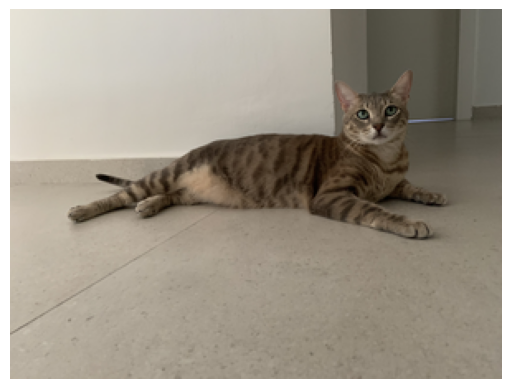

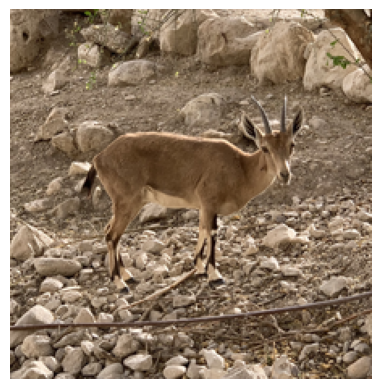

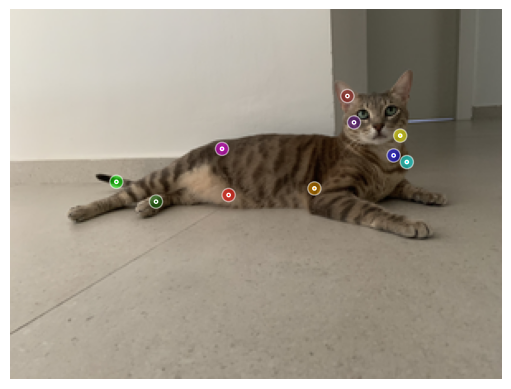

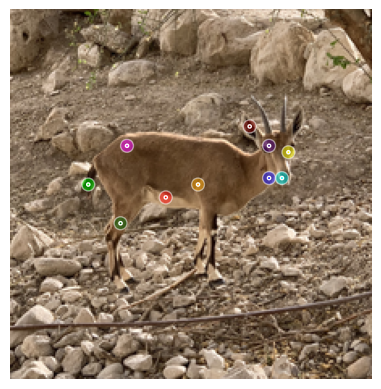

In [78]:
import matplotlib.pyplot as plt
import torch
from correspondences import find_correspondences, draw_correspondences
from PIL import Image


with torch.no_grad():
    points1, points2, image1_pil, image2_pil = find_correspondences(image_path1, image_path2, num_pairs, load_size, layer,
                                                                   facet, bin, thresh, model_type, stride)
fig_1, ax1 = plt.subplots()
ax1.axis('off')
ax1.imshow(image1_pil)
fig_2, ax2 = plt.subplots()
ax2.axis('off')
ax2.imshow(image2_pil)


fig1, fig2 = draw_correspondences(points1, points2, image1_pil, image2_pil)
plt.show()

In [22]:
import numpy as np

In [23]:
points1

[(72, 208),
 (120, 84),
 (92, 228),
 (84, 152),
 (48, 240),
 (112, 132),
 (104, 60),
 (52, 204),
 (124, 44),
 (88, 208)]

In [68]:
p1= []
for i in range(len(points1)):
    p1.append(list(points1[i]))
p2= []
for i in range(len(points2)):
    p2.append(list(points2[i]))
    
    
    

In [70]:
p1, p2 = np.array(p1), np.array(p2)

In [72]:
print(p1[:,0], p2[:,0])


[ 72 120  92  84  48 112 104  52 124  88] [ 88 136 100  88  72 116 108  72 160  96]


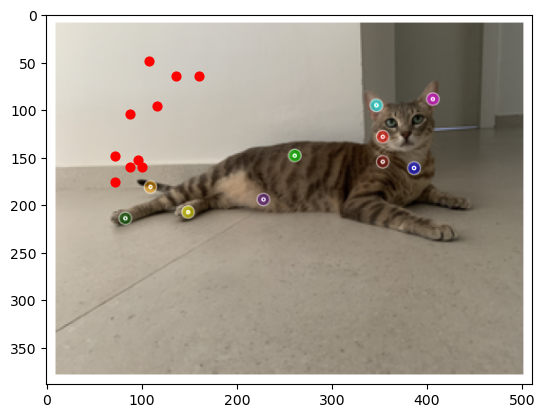

In [66]:
img1 = np.asarray(Image.open("/home/yousuf/Desktop/CODE/bachelor/dino-vit-features/outputcat.png"))
imgplot = plt.imshow(img1)
plt.scatter(p[:, 0], p[:, 1], c='r', s=40)

plt.show()


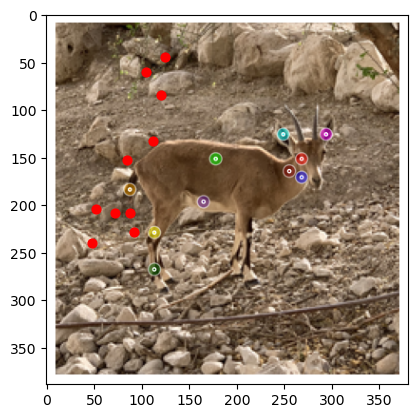

In [75]:
img1 = np.asarray(Image.open("/home/yousuf/Desktop/CODE/bachelor/dino-vit-features/output.png"))
imgplot = plt.imshow(img1)
plt.scatter(p1[:, 0], p1[:, 1], c='r', s=40)

plt.show()
